In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('data/raw/df_with_all_cols.csv.gz', compression='gzip')

C:\Users\study\AppData\Local\Temp\ipykernel_35648\1021840498.py:1: DtypeWarning: Columns (24,49,50,57,60,61,88,150,171,172,173,174,175,177,178,184,185,186,205,206,216,217,218,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/raw/df_with_all_cols.csv.gz', compression='gzip')


In [5]:
df.head()

,case_id,date_decision,MONTH,WEEK_NUM,target,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,...,pmtscount_423L,pmtssum_45A,requesttype_4525192L,responsedate_1012D,responsedate_4527233D,responsedate_4917613D,riskassesment_302T,riskassesment_940T,secondquarter_766L,thirdquarter_1082L
0,0,2019-01-03,201901,0,0,NaN,NaN,1917.6,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-03,201901,0,0,NaN,NaN,3134.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-01-04,201901,0,0,NaN,NaN,4937.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2019-01-03,201901,0,0,NaN,NaN,4643.6,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2019-01-04,201901,0,1,NaN,NaN,3390.2,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


([<matplotlib.patches.Wedge at 0x209a1a9b6d0>,
 [Text(-1.0946395745925022, 0.1084629048843239, '0'),
  Text(1.0946395733231236, -0.10846291769526761, '1')],
 [Text(-0.5970761315959102, 0.05916158448235849, '96.9%'),
  Text(0.5970761309035219, -0.05916159147014596, '3.1%')])

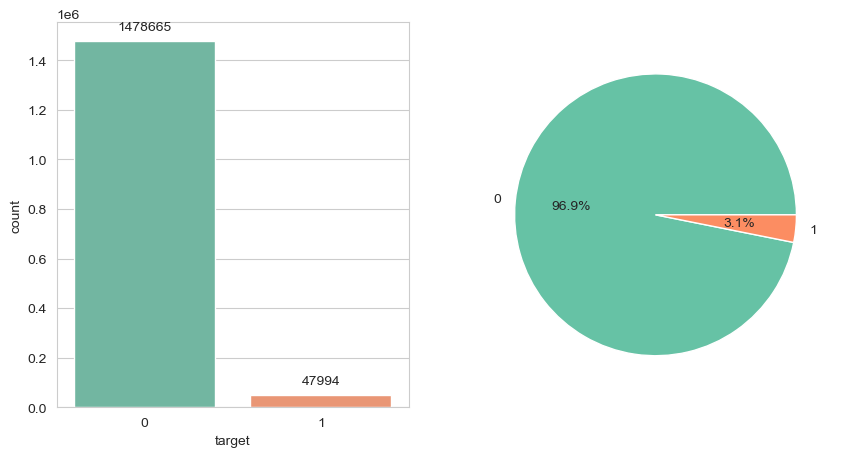

In [6]:
# Check class balance
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax = sns.countplot(data=df, x='target', palette="Set2")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.subplot(1,2,2)
plt.pie(df['target'].value_counts(), labels=['0','1'], autopct='%1.1f%%', colors=sns.color_palette("Set2"))

Null Values visualization

In [10]:
df.isna().sum()

case_id                        0
date_decision                  0
MONTH                          0
WEEK_NUM                       0
target                         0
                          ...   
responsedate_4917613D    1301747
riskassesment_302T       1473100
riskassesment_940T       1473099
secondquarter_766L        140968
thirdquarter_1082L        140968
Length: 224, dtype: int64

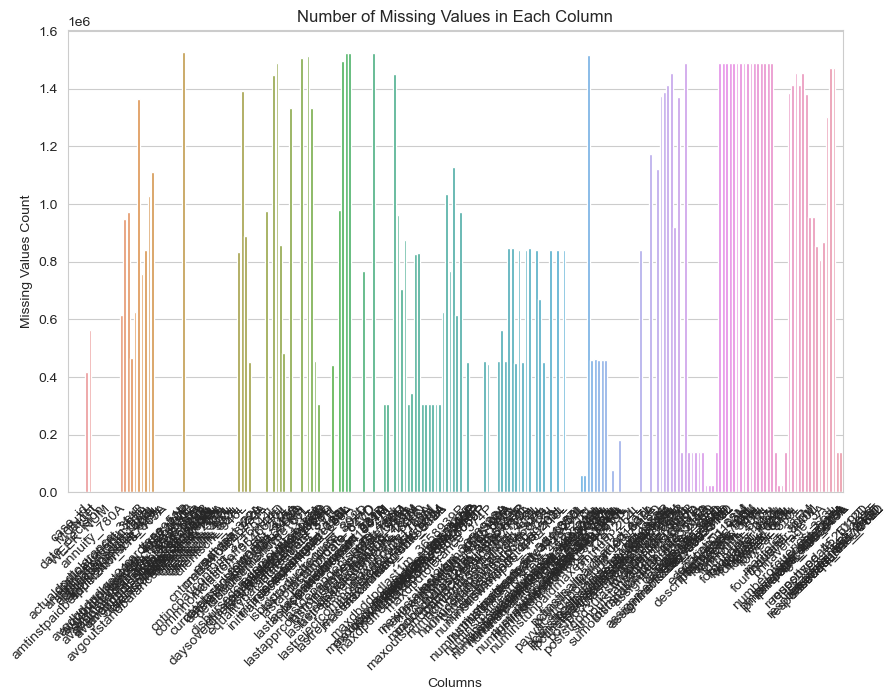

In [11]:
missing_values_count = df.isna().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values)
plt.xticks(rotation=45)
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.show()

In [12]:
missing_values_count = df.isna().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100

In [13]:
columns_with_high_missing_values = missing_values_percentage[missing_values_percentage > 50]

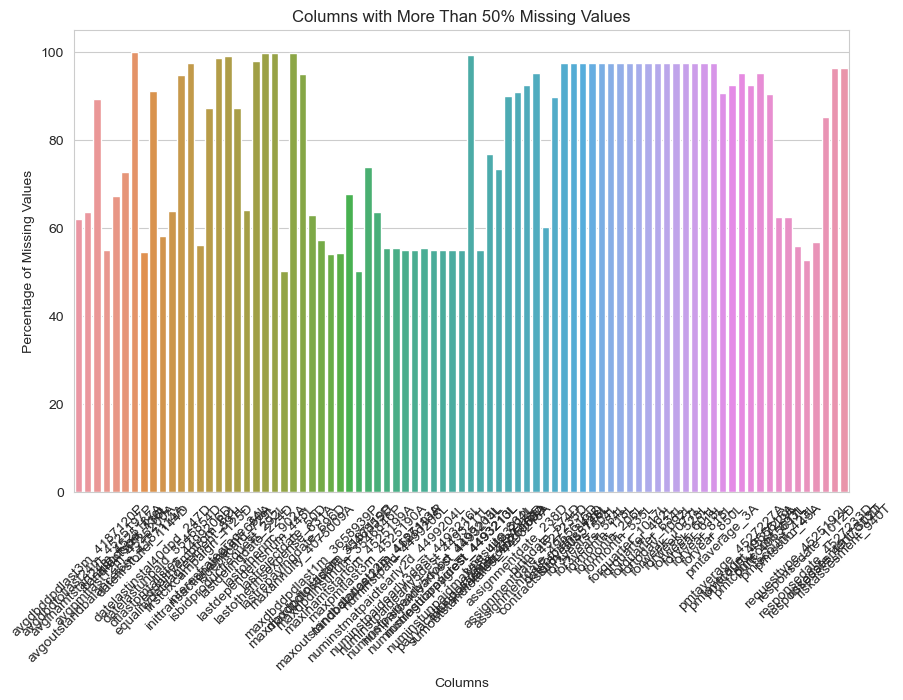

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=columns_with_high_missing_values.index, y=columns_with_high_missing_values.values)
plt.xticks(rotation=45)
plt.title('Columns with More Than 50% Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [15]:
df_high_missing_values = df[columns_with_high_missing_values.index]


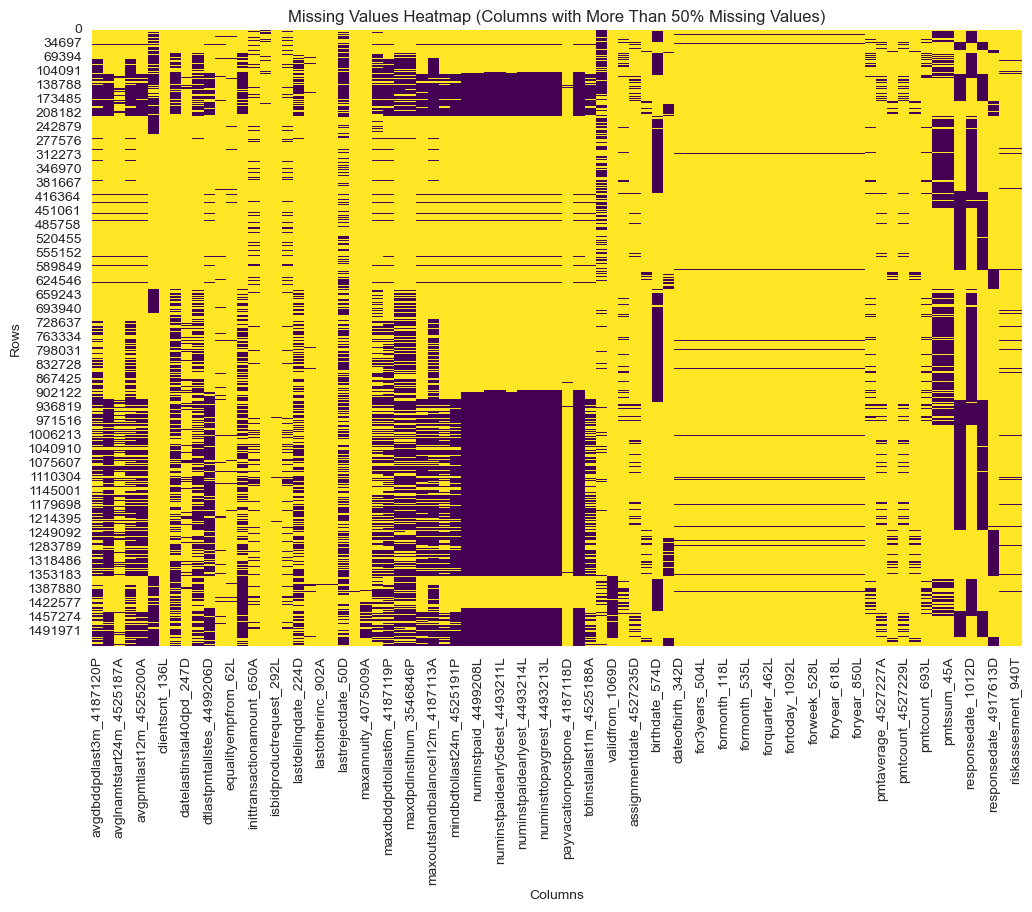

In [16]:
# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_high_missing_values.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap (Columns with More Than 50% Missing Values)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()